In [17]:
# import numpy package under shorthand "np"

import numpy as np        
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns #data visualization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


# Regression import 


%config Completer.use_jedi = False  # enable code auto-completion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss # evaluation metrics
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import mean_squared_error    # function to calculate mean squared error 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV


In [18]:

# read in data from the file

df = pd.read_csv('Strokeprediction.csv')

# drop unrelevant columns
df.drop(columns=['ever_married','work_type','Residence_type'],inplace=True) 

df.head()





,id,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,174.12,24.0,never smoked,1


In [19]:
df.shape

(5110, 9)

In [20]:
## checking for null values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [21]:
# remove rows from dataframe "df" which contain missing values

df = df.dropna(axis=0) #rows are considered as axis 0
df.head()


,id,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,186.21,29.0,formerly smoked,1


In [22]:
df.shape

(4909, 9)

In [23]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: count, dtype: int64

In [24]:
## there is 1483 Unknown, we need to replace them with null values

# Replacing Unknown values with nulls.

df['smoking_status'].replace('Unknown', np.nan, inplace=True)

# Drop the nulls.
column_values = df['smoking_status'].dropna() 
sampled_values = np.random.choice(column_values, size=df['smoking_status'].isnull().sum(), replace=True)
df.loc[df['smoking_status'].isnull(), 'smoking_status'] = sampled_values
df['smoking_status'].value_counts() 


/tmp/ipykernel_282/2315681421.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['smoking_status'].replace('Unknown', np.nan, inplace=True)


smoking_status
never smoked       2637
formerly smoked    1196
smokes             1076
Name: count, dtype: int64

In [25]:
df.shape

(4909, 9)

In [26]:
# binarize smoking status
df["smoking_status"]=df["smoking_status"].replace("never smoked",0)
df["smoking_status"]=df["smoking_status"].replace("formerly smoked",1)
df["smoking_status"]=df["smoking_status"].replace("smokes",1)

/tmp/ipykernel_282/3710939557.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["smoking_status"]=df["smoking_status"].replace("smokes",1)


In [27]:
df['smoking_status'].value_counts() 

smoking_status
0    2637
1    2272
Name: count, dtype: int64

In [28]:
#len(df),len(df[df['gender'] != 'Other'])

In [29]:
# binarize gender 
df["gender"]=df["gender"].replace("Male",0)
df["gender"]=df["gender"].replace("Female",1)
df = df[(df['gender'] != 'Other')]


In [30]:
df['gender'].value_counts()

gender
1    2897
0    2011
Name: count, dtype: int64

/tmp/ipykernel_282/1475483299.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x = 'stroke',palette=colorpalette)
/opt/software/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/software/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


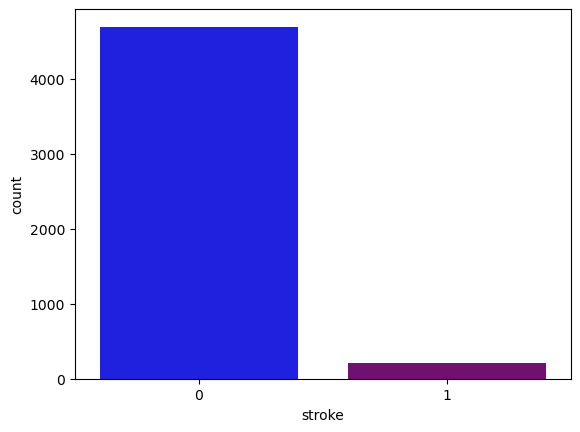

In [62]:
# Let's visualize our label - the precence of stroke 

colorpalette = {'0': 'blue', '1': 'purple'}
sns.countplot(data= df, x = 'stroke',palette=colorpalette)
plt.show()



In [32]:
df['stroke'].value_counts() 

stroke
0    4699
1     209
Name: count, dtype: int64

/opt/software/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/software/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


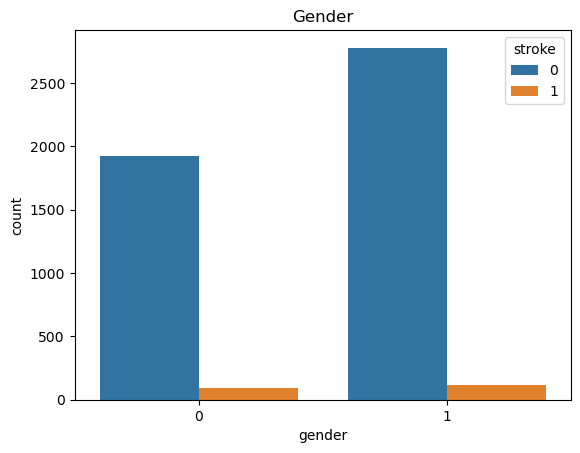

/opt/software/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/software/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


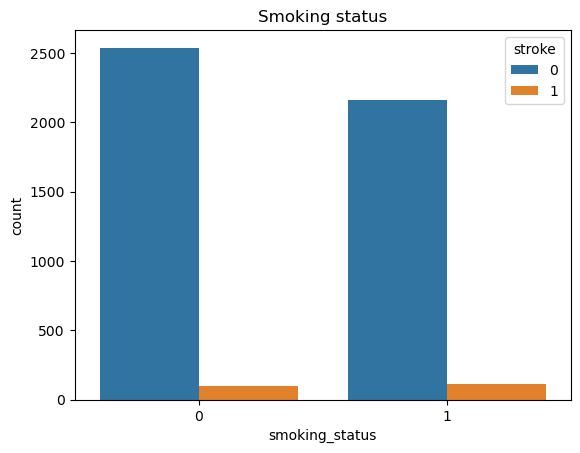

count    4908.000000
mean        0.042584
std         0.201937
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: stroke, dtype: float64

In [33]:

# Visualize the label
# Choose some features to visualize

# Gender
sns.countplot(data=df, x = "gender", hue = "stroke")
plt.title("Gender")
plt.show()


# smoking_status
sns.countplot(data=df, x = "smoking_status", hue = "stroke")
plt.title("Smoking status")
plt.show()

df['stroke'].describe()


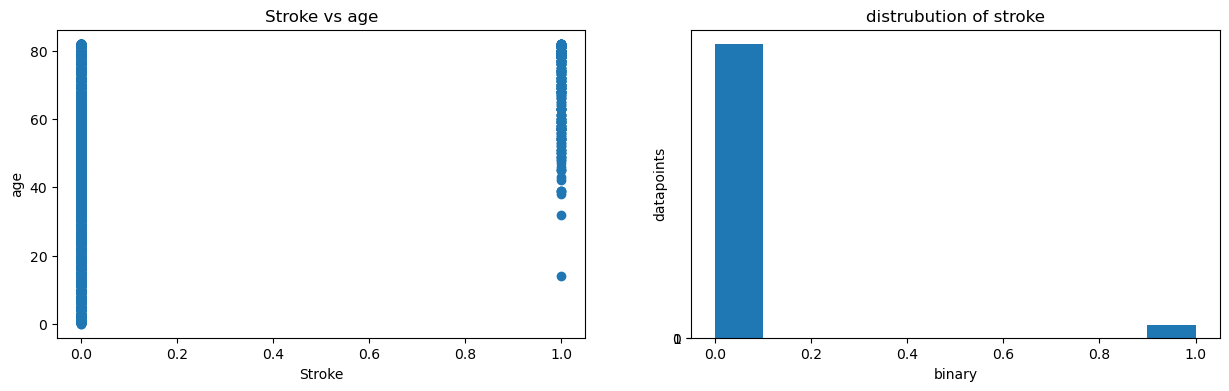

In [34]:
# Visualize data
fig, axes = plt.subplots(1, 2, figsize=(15,4))
axes[0].scatter(df['stroke'],df['age']);
axes[0].set_xlabel("Stroke")
axes[0].set_ylabel("age")
axes[0].set_title("Stroke vs age")

axes[1].hist(df['stroke']);
axes[1].set_title('distrubution of stroke')
axes[1].set_xlabel("binary")
axes[1].set_ylabel("datapoints")
axes[1].set_yticks([0,1])
plt.show()



In [35]:
# Preproccesing

X = df.drop('stroke', axis=1)
y= df['stroke']

oversample = SMOTE()
X,y = oversample.fit_resample(X, y)

<Axes: >

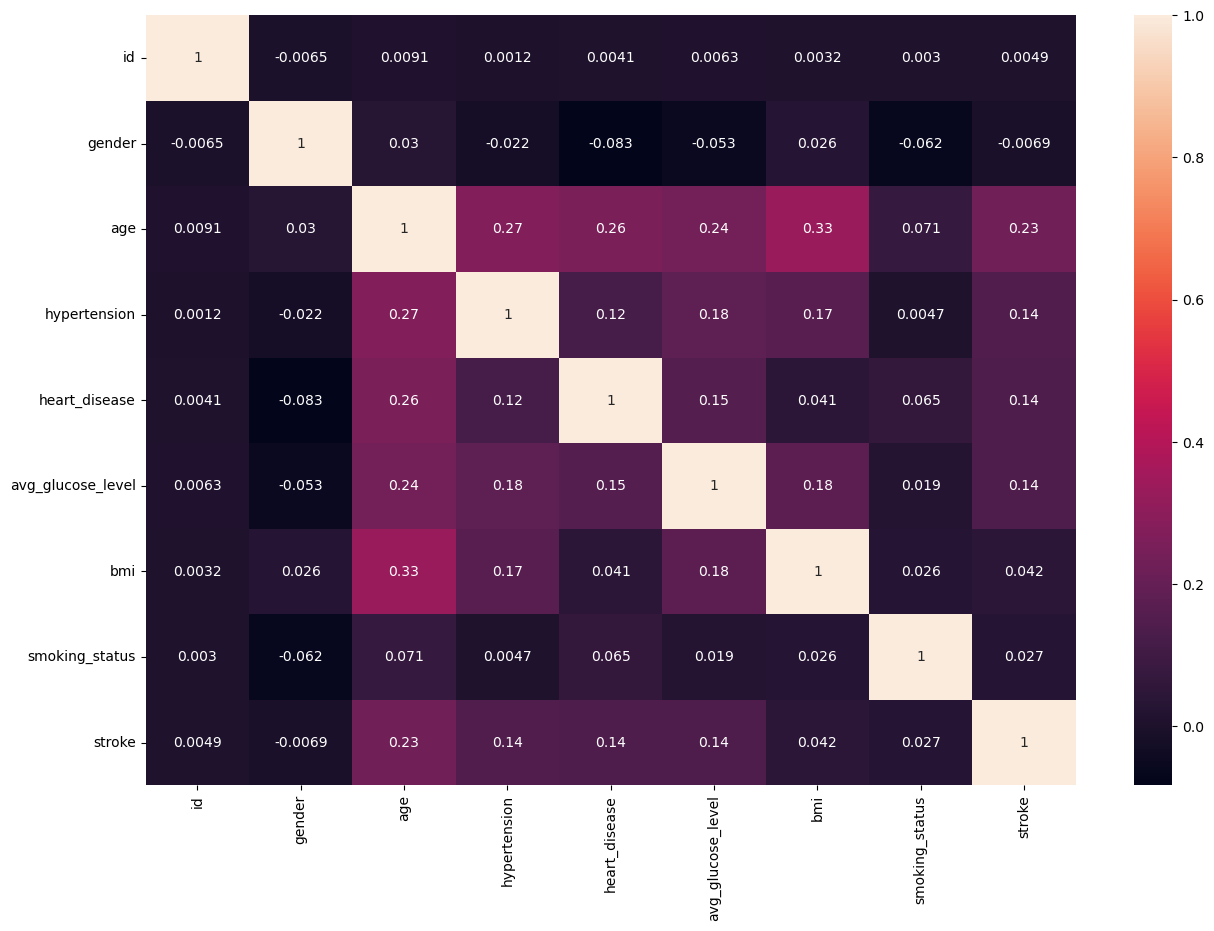

In [36]:
# let's visualize the correlation between features
feature_correlation = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(feature_correlation, annot=True)

In [37]:
# first method 

# Let's standard the features, because our features have different units and scales


standardscaler = StandardScaler()
ss_X = standardscaler.fit_transform(X)


In [38]:

# Split the dataset into a training set and a validation set

X_train, X_rem, y_train, y_rem = train_test_split(ss_X, y, test_size=0.7)

X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

# Logistic Regression

clf1 = LogisticRegression(random_state=42)
clf1.fit(X_train, y_train)

y_pred = clf1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred)

# let's get the accuracy of the validation set for the upcoming comparison
y_pred_val = clf1.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)


print("accuracy of LogReg : ", accuracy1)
print("accuracy of LogReg : ", accuracy_val)



accuracy of LogReg :  0.8003039513677812
accuracy of LogReg :  0.7947704469443599


accuracy of LogReg :  0.8003039513677812
LogLoss:  0.4351054636308425
[[1283  398]
 [ 259 1350]]


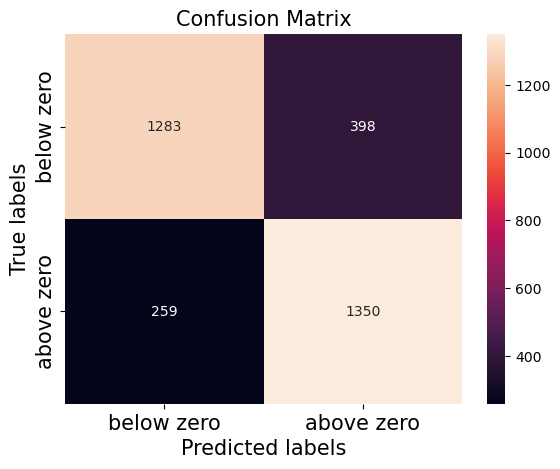

In [39]:

# Our loss function
loss_func = log_loss(y_test, clf1.predict_proba(X_test))


# Confusion matrix

conf_mat = confusion_matrix(y_test,y_pred)

# Visualize the confusion matrix you computed
ax= plt.subplot()

sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15)
ax.set_title('Confusion Matrix',fontsize=15)
ax.xaxis.set_ticklabels(['below zero', 'above zero'],fontsize=15)
ax.yaxis.set_ticklabels(['below zero', 'above zero'],fontsize=15)


print("accuracy of LogReg : ", accuracy1)
print("LogLoss: ", loss_func)
print(conf_mat) #print the confusion matrix




In [40]:
# F1
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.76      0.83      0.80      1542
           1       0.84      0.77      0.80      1748

    accuracy                           0.80      3290
   macro avg       0.80      0.80      0.80      3290
weighted avg       0.80      0.80      0.80      3290



In [41]:
# The Error - kysytään

error1 = 1-(accuracy1)
print("The Error rate for Logistic Regression is ", error1)

The Error rate for Logistic Regression is  0.1996960486322188


In [42]:
# Second method 



(2819, 8)
(2819,)
(3289, 8)
(3289,)
(3290, 8)
(3290,)
The accuracy  :  0.8820668693009118


[Text(0.3451458333333333, 0.9761904761904762, 'x[2] <= 54.021\ngini = 0.5\nsamples = 2819\nvalue = [1434, 1385]'),
 Text(0.09356666666666667, 0.9285714285714286, 'x[2] <= 44.286\ngini = 0.214\nsamples = 1109\nvalue = [974, 135]'),
 Text(0.02666666666666667, 0.8809523809523809, 'x[2] <= 38.261\ngini = 0.046\nsamples = 761\nvalue = [743, 18]'),
 Text(0.008533333333333334, 0.8333333333333334, 'x[6] <= 29.914\ngini = 0.016\nsamples = 613\nvalue = [608, 5]'),
 Text(0.004266666666666667, 0.7857142857142857, 'gini = 0.0\nsamples = 458\nvalue = [458, 0]'),
 Text(0.0128, 0.7857142857142857, 'x[6] <= 30.021\ngini = 0.062\nsamples = 155\nvalue = [150, 5]'),
 Text(0.008533333333333334, 0.7380952380952381, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.017066666666666667, 0.7380952380952381, 'x[5] <= 58.273\ngini = 0.038\nsamples = 153\nvalue = [150, 3]'),
 Text(0.008533333333333334, 0.6904761904761905, 'x[5] <= 57.528\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.004266666666666667, 0.6

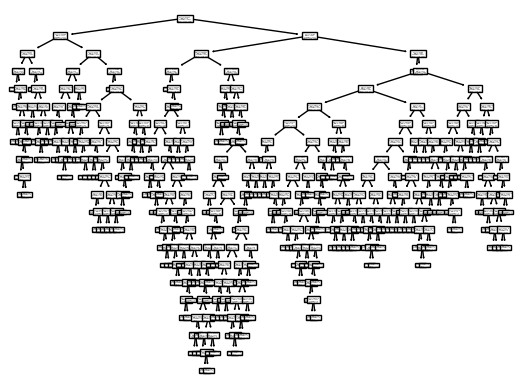

In [43]:

# Split the dataset into a training set and a validation set

X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.7)

X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

print(X_train.shape), print(y_train.shape)
print(X_val.shape), print(y_val.shape)
print(X_test.shape), print(y_test.shape)

# Decision Tree classifier
##mistä randomstate
clf2 = DecisionTreeClassifier(random_state=42)
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred)

##Decisiontre.accuracy_score(val....)
print("The accuracy  : ", accuracy2)

tree.plot_tree(clf2)




In [44]:
# Overfit Check
y_pred_train = clf2.predict(X_train)
training_accuracy = accuracy_score(y_train, y_pred_train)
print("The training accuracy is ", training_accuracy)

The training accuracy is  1.0


In [48]:

# It was overfitted
# Pruning
# Hypermetertuning
parameters = {"criterion":["gini","entropy"],"max_depth":range(1,6),"max_features":range(1,8)}
decisiontree_cv = GridSearchCV(clf2,parameters, cv=5)
decisiontree_cv.fit(X_train,y_train)
print(decisiontree_cv.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 7}


New accuracy:  0.7924012158054711


[Text(0.5, 0.8333333333333334, 'hypertension <= 54.021\ngini = 0.5\nsamples = 2819\nvalue = [1434, 1385]'),
 Text(0.25, 0.5, 'hypertension <= 44.286\ngini = 0.214\nsamples = 1109\nvalue = [974, 135]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.046\nsamples = 761\nvalue = [743, 18]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.446\nsamples = 348\nvalue = [231, 117]'),
 Text(0.75, 0.5, 'age <= 0.002\ngini = 0.393\nsamples = 1710\nvalue = [460, 1250]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.498\nsamples = 416\nvalue = [195, 221]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.326\nsamples = 1294\nvalue = [265, 1029]')]

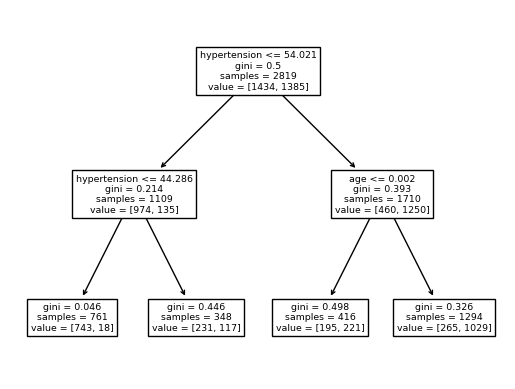

In [53]:
# Our second Decision Tree

new_clf2 = DecisionTreeClassifier(criterion = "gini", max_depth = 2, max_features = 4, random_state=42)

new_clf2.fit(X_train, y_train)

new_y_pred = new_clf2.predict(X_test)
new_accuracy = accuracy_score(y_test, new_y_pred)

print("New accuracy: ", new_accuracy)


features = ['gender','age','hypertension','heart_disease','avg_glucose_level','bmi','smoking_status']
tree.plot_tree(new_clf2, feature_names = features )


In [54]:

# F1
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1650
           1       0.88      0.89      0.88      1640

    accuracy                           0.88      3290
   macro avg       0.88      0.88      0.88      3290
weighted avg       0.88      0.88      0.88      3290



In [55]:
# The Error - kysytään

error2 = 1-(new_accuracy)
print(" Error rate for Decision tree  is ", error2)

 Error rate for Decision tree  is  0.20759878419452893


[[1442  180]
 [ 208 1460]]


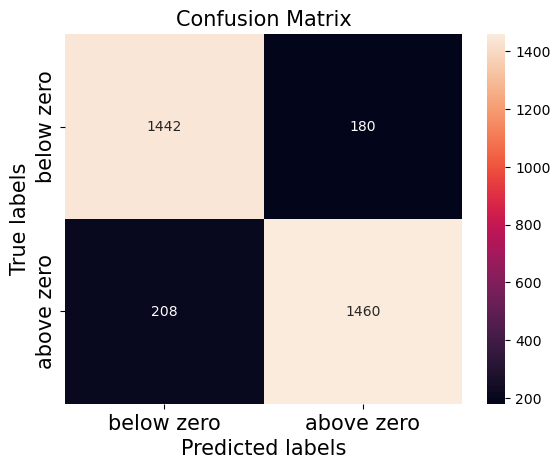

In [56]:

# Confusion matrix

conf_mat = confusion_matrix(y_test,y_pred)

# Visualize the confusion matrix you computed
ax= plt.subplot()

sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15)
ax.set_title('Confusion Matrix',fontsize=15)
ax.xaxis.set_ticklabels(['below zero', 'above zero'],fontsize=15)
ax.yaxis.set_ticklabels(['below zero', 'above zero'],fontsize=15)


print(conf_mat) #print the confusion matrix



